# 시험 문제 예제
1. 서울역의 시간대별로 승차 인원 선 그래프를 그리세요.
1. 아침 9~10시 사이에 하차인원이 가장 많은 역 5개를 찾으세요.
1. 승차인원에 비해서 하차 인원의 비율이 높은 역 5개를 찾으세요
1. 하루 중 승차인원이 가장 많은 시간은 언제입니까? (예 : 1시~2시)
1. 유임 하차에 비해 무임 하차 비율이 가장 높은 역 5개를 찾으세요.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# 가산점
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls',
                  sheet_name=3, encording='cp949', skiprows=1, index_col=3)
df.shape

(597, 52)

In [4]:
df.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,...,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23,Unnamed: 52
서울역,2019-05,1호선,150,"1,148",21,"11,958","10,579","15,684","61,286","44,585",...,"22,083","4,127","7,762",3,548,0,0,0,0,2019-06-03 10:56:25
시청,2019-05,1호선,151,89,5,"2,843","4,674","4,169","24,963","8,926",...,"4,767",931,"1,426",1,25,0,0,0,0,2019-06-03 10:56:25
종각,2019-05,1호선,152,116,3,"4,576","5,233","4,780","33,366","7,695",...,"5,882","3,973","1,565",1,1,0,0,0,0,2019-06-03 10:56:25
종로3가,2019-05,1호선,153,216,16,"5,505","3,036","4,790","16,235","7,163",...,"6,715","3,375","2,753",1,37,0,1,0,0,2019-06-03 10:56:25
종로5가,2019-05,1호선,154,51,3,"2,245","4,205","3,415","19,150","6,140",...,"3,661",810,"1,200",0,6,0,0,0,0,2019-06-03 10:56:25


In [17]:
data = df.iloc[:, 3:-1]                     # 가산점, 날짜, 호선, 작업일자 제외
data = data.replace(',','', regex=True)     # , 없애기
data = data.astype(np.int)                  # 정수로 변환
data.info

<bound method DataFrame.info of                 승차  하차   승차.1   하차.1   승차.2   하차.2    승차.3    하차.3    승차.4  \
서울역           1148  21  11958  10579  15684  61286   44585  115354   89357   
시청              89   5   2843   4674   4169  24963    8926   74288   11999   
종각             116   3   4576   5233   4780  33366    7695  108663   12735   
종로3가           216  16   5505   3036   4790  16235    7163   33766   12372   
종로5가            51   3   2245   4205   3415  19150    6140   46654   10238   
동대문            776  12  17333   2452  12614   9043   19979   17282   26926   
신설동            315  38  11021   2103  11002   9714   22990   30373   32986   
제기동            360   6   5600   2439  10512  10759   26059   22594   37545   
청량리(서울시립대입구)  1430   9  13965   3611  19600  13875   50958   22529   67407   
동묘앞            136  11   3712    876   3992   4354    7349   13980   10925   
시청             109   2   1455   1763   2686  18049    6298   70766   10032   
을지로입구          131   3   3186   

In [18]:
data.loc['서울역'] # 서울역이 여러개 있으면 더하자

,승차,하차,승차.1,하차.1,승차.2,하차.2,승차.3,하차.3,승차.4,하차.4,...,승차.19,하차.19,승차.20,하차.20,승차.21,하차.21,승차.22,하차.22,승차.23,하차.23
서울역,1148,21,11958,10579,15684,61286,44585,115354,89357,238583,...,37939,22083,4127,7762,3,548,0,0,0,0
서울역,231,8,5493,1112,7325,20106,14219,41833,21160,108752,...,7632,15932,832,5569,1,672,0,0,0,0
서울역,5,4,63,310,81,2130,9052,3101,18943,4233,...,6013,428,1071,29,0,0,0,0,0,0
서울역,4,0,763,11,1187,8055,2200,17813,3805,53440,...,2892,1741,2,148,0,0,0,0,0,0
서울역,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
서울역,235,2,5886,1512,7067,14970,14821,21519,21942,30321,...,9580,6582,173,3003,0,0,0,0,0,0


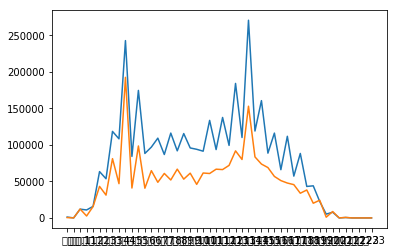

In [22]:
seoul_station = data.loc['서울역']
p = plt.plot(np.sum(seoul_station[::2], axis=0))  # 짝수 : 승차
p = plt.plot(np.sum(seoul_station[1::2], axis=0)) # 홀수 : 하차

In [25]:
# 2. 아침 9~10시 사이에 하차인원이 가장 많은 역 5개를 찾으시고 bar 그래프로 그리세요.
col = 11   # 9~10시 사이 하차인원
morning_10_off = data.iloc[:,col]

In [29]:
y = morning_10_off.sort_values(ascending=False)[:5]  # 큰 것 5개

<BarContainer object of 5 artists>

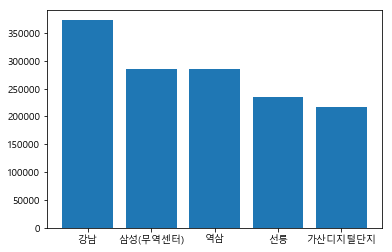

In [31]:
plt.rc('font', family='Malgun Gothic')
plt.bar(y.index, y)

In [37]:
# 3. 승차인원에 비해서 하차 인원의 비율이 높은 역 5개를 찾으세요.
# 짝수 : 승차, 홀수 : 하차
승차 = data.iloc[:, ::2]
하차 = data.iloc[:, 1::2]

In [42]:
승차합 = np.sum(승차, axis=1)
하차합 = np.sum(하차, axis=1)

In [45]:
비율 = 하차합/승차합

In [46]:
비율.sort_values(ascending=False)[:5]

서울역      1.730587
인천       1.688396
선릉       1.683228
고속터미널    1.540680
공덕       1.317531
dtype: float64

In [62]:
# 4. 하루 중 승차인원이 가장 많은 시간은 언제입니까? (예 : 1시~2시)
승하차인원 = np.sum(data, axis=0)
승차인원 = 승하차인원[::2]
4 + np.argmax(승차인원.values),'시'    # 승차 : 4, 승차14 = 14+4

(18, '시')

In [58]:
승차인원.index  # 승차 : 4, 승차14 = 14+4

Index(['승차', '승차.1', '승차.2', '승차.3', '승차.4', '승차.5', '승차.6', '승차.7', '승차.8',
       '승차.9', '승차.10', '승차.11', '승차.12', '승차.13', '승차.14', '승차.15', '승차.16',
       '승차.17', '승차.18', '승차.19', '승차.20', '승차.21', '승차.22', '승차.23'],
      dtype='object')

In [59]:
승차인원.values

array([  136144,  3586585,  7173093, 18673526, 21660035, 14028472,
       10597036, 10488157, 11472241, 11989828, 11825103, 13071881,
       15115972, 18553044, 24606001, 14232425, 11346789, 10917666,
        9124017,  4163994,   575460,      456,      128,        0],
      dtype=int64)

In [65]:
# 5. 유임 하차에 비해 무임 하차 비율이 가장 높은 역 5개를 찾으세요.
df = pd.read_excel('2019년 05월  교통카드 통계자료.xls',
                  sheet_name=2, encording='cp949', skiprows=0, index_col=3)
df.head(3)

,사용월,호선명,역ID,유임승차,유임하차,무임승차,무임하차,작업일시
지하철역,,,,,,,,
서울역,2019-05,1호선,150,"1,568,570","1,489,737","247,801","242,107",2019-06-03 10:56:20
시청,2019-05,1호선,151,"709,821","727,110","112,279","112,016",2019-06-03 10:56:20
종각,2019-05,1호선,152,"1,204,910","1,151,371","176,083","164,915",2019-06-03 10:56:20


In [67]:
subway = df.iloc[:,3:-1]
subway = subway.replace(',','',regex=True).astype('int')
subway.head(3)

,유임승차,유임하차,무임승차,무임하차
지하철역,,,,
서울역,1568570,1489737,247801,242107
시청,709821,727110,112279,112016
종각,1204910,1151371,176083,164915


In [68]:
유임하차 = subway['유임하차']
무임하차 = subway['무임하차']
비율 = 무임하차/유임하차

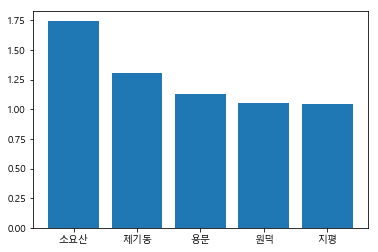

In [72]:
y = 비율.sort_values(ascending=False)[:5]
p = plt.bar(y.index, y)

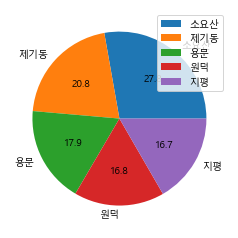

In [75]:
m = plt.pie(y, labels=y.index, autopct='%.1f')
m = plt.legend()